<a href="https://colab.research.google.com/github/aadipoddar/Lung-Cancer-ML/blob/main/LungCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from sklearn.metrics import classification_report, accuracy_score, r2_score, confusion_matrix

#Data Preparation

In [ ]:
df = pd.read_csv('survey lung cancer.csv')
df.columns = df.columns.str.strip()
print(df)

    GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        1               2        2              1   
1        M   74        2               1        1              1   
2        F   59        1               1        1              2   
3        M   63        2               2        2              1   
4        F   63        1               2        1              1   
..     ...  ...      ...             ...      ...            ...   
304      F   56        1               1        1              2   
305      M   70        2               1        1              1   
306      M   58        2               1        1              1   
307      M   67        2               1        2              1   
308      M   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                  1        2        1         2                  2         2   
1                  2 

In [ ]:
for col in df.columns:
  df[col] = df[col].replace({'1': 0, '2': 1})

df['GENDER'] = df['GENDER'].replace({'M': 1, 'F': 0})
df['LUNG_CANCER'] = df['LUNG_CANCER'].replace({'YES': 1, 'NO': 0})

print(df)

     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0         1   69        1               2        2              1   
1         1   74        2               1        1              1   
2         0   59        1               1        1              2   
3         1   63        2               2        2              1   
4         0   63        1               2        1              1   
..      ...  ...      ...             ...      ...            ...   
304       0   56        1               1        1              2   
305       1   70        2               1        1              1   
306       1   58        2               1        1              1   
307       1   67        2               1        2              1   
308       1   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                  1        2        1         2                  2         2   
1        

<ipython-input-60-2f0e7aac94f0>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['GENDER'] = df['GENDER'].replace({'M': 1, 'F': 0})
<ipython-input-60-2f0e7aac94f0>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['LUNG_CANCER'] = df['LUNG_CANCER'].replace({'YES': 1, 'NO': 0})


#Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = df.drop(columns=['LUNG_CANCER'])
y = df['LUNG_CANCER']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

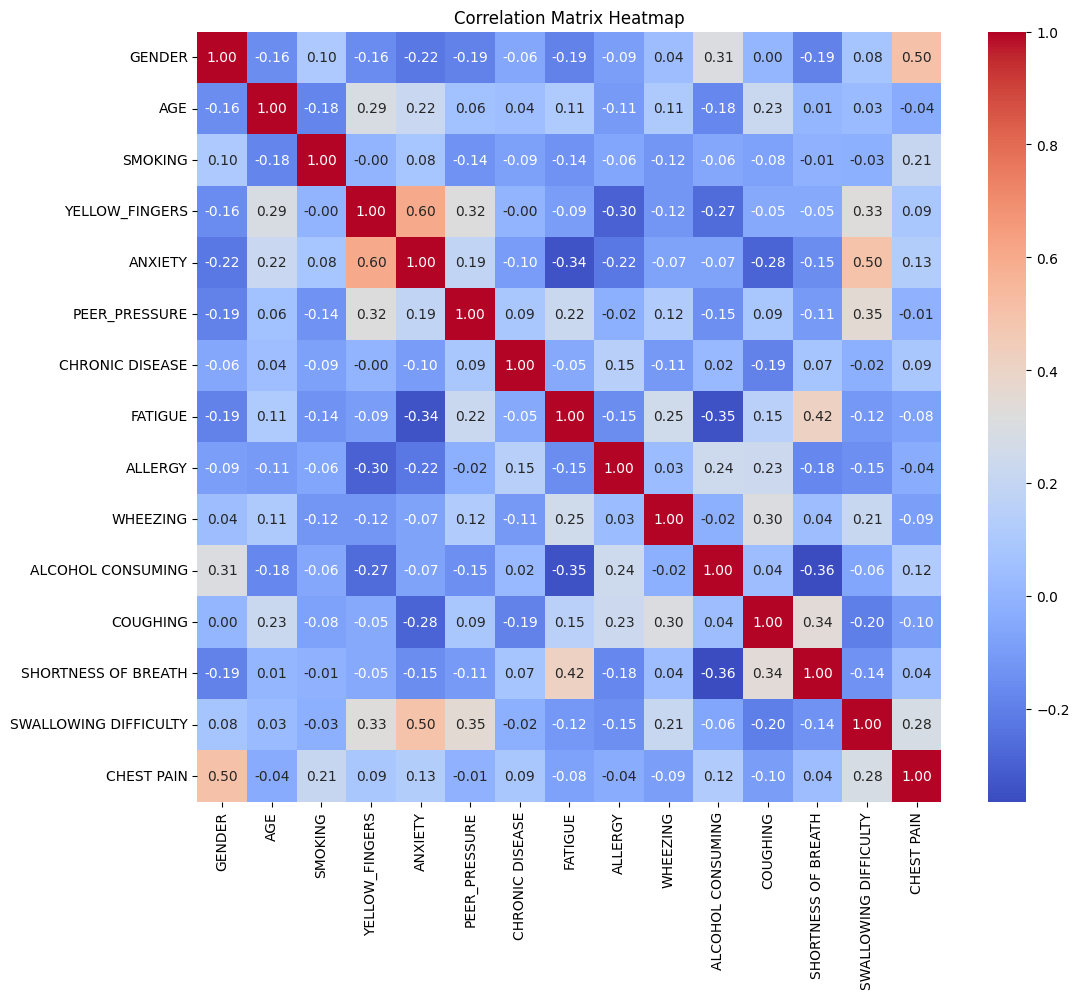

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = x_test.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
mse = cross_val_score(lin_reg, x_train, y_train, scoring='neg_mean_squared_error', cv=5)
mean_mse = np.mean(mse)

print(f"Mean Square Error (MSE): {mse}")
print(f"Mean of MSE: {mean_mse}")

Mean Square Error (MSE): [-0.06240464 -0.10083204 -0.08282308 -0.11788526 -0.07190797]
Mean of MSE: -0.08717059843379187


In [ ]:
y_pred = lin_reg.predict(x_test)

r2_score1 = r2_score(y_pred, y_test)
print(f"R2 Score: {r2_score1}")

R2 Score: -0.27453327218806


#Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

params = {'alpha': [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}

ridge_regressor = GridSearchCV(ridge, params, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 10}
-0.08501183781577708


In [ ]:
mse = cross_val_score(ridge_regressor, x_train, y_train, scoring='neg_mean_squared_error', cv=5)
mean_mse = np.mean(mse)

print(f"Mean Square Error (MSE): {mse}")
print(f"Mean of MSE: {mean_mse}")

Mean Square Error (MSE): [-0.0639938  -0.09233465 -0.0805934  -0.12310473 -0.0650326 ]
Mean of MSE: -0.08501183781577708


In [ ]:
y_pred = ridge_regressor.predict(x_test)

r2_score1 = r2_score(y_pred, y_test)
print(f"R2 Score: {r2_score1}")

R2 Score: -0.40995768014421974


#Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()

params = {'alpha': [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}

lasso_regressor = GridSearchCV(lasso, params, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.001}
-0.08689985556286134


In [ ]:
mse = cross_val_score(lasso_regressor, x_train, y_train, scoring='neg_mean_squared_error', cv=5)
mean_mse = np.mean(mse)

print(f"Mean Square Error (MSE): {mse}")
print(f"Mean of MSE: {mean_mse}")

Mean Square Error (MSE): [-0.06291676 -0.09955315 -0.08700388 -0.11905419 -0.0705677 ]
Mean of MSE: -0.08781913517914805


In [ ]:
y_pred = lasso_regressor.predict(x_test)

r2_score1 = r2_score(y_pred, y_test)
print(f"R2 Score: {r2_score1}")

R2 Score: -0.3091275136656959


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

params = [{'C': [1, 5, 10]}, {'max_iter': [100, 150]}]

logistic_regressor = LogisticRegression(C=100, max_iter=100)
logistic_regressor = GridSearchCV(logistic_regressor, param_grid=params, scoring='f1', cv=5)
logistic_regressor.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(C=100),
             param_grid=[{'C': [1, 5, 10]}, {'max_iter': [100, 150]}],
             scoring='f1')

In [ ]:
print(logistic_regressor.best_params_)
print(logistic_regressor.best_score_)

{'C': 10}
0.9508368740754729


In [ ]:
y_pred = logistic_regressor.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
confusion_matrix(y_pred, y_test)

array([[ 1,  0],
       [ 1, 60]])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100}")
print(classification_report(y_test, y_pred, target_names=["No Cancer", "Cancer"]))

Accuracy: 98.38709677419355
              precision    recall  f1-score   support

   No Cancer       1.00      0.50      0.67         2
      Cancer       0.98      1.00      0.99        60

    accuracy                           0.98        62
   macro avg       0.99      0.75      0.83        62
weighted avg       0.98      0.98      0.98        62



#DecisionTreeClassifier

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

decisionTree = DecisionTreeClassifier()
decisionTree.fit(x_train, y_train)

y_pred = decisionTree.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100}")
print(classification_report(y_test, y_pred, target_names=["No Cancer", "Cancer"]))

Accuracy: 96.7741935483871
              precision    recall  f1-score   support

   No Cancer       0.50      0.50      0.50         2
      Cancer       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



[Text(0.7550872093023255, 0.95, 'x[8] <= 1.5\ngini = 0.255\nsamples = 247\nvalue = [37, 210]'),
 Text(0.6031976744186046, 0.85, 'x[13] <= 1.5\ngini = 0.402\nsamples = 115\nvalue = [32, 83]'),
 Text(0.679142441860465, 0.8999999999999999, 'True  '),
 Text(0.39244186046511625, 0.75, 'x[11] <= 1.5\ngini = 0.495\nsamples = 62\nvalue = [28, 34]'),
 Text(0.19186046511627908, 0.65, 'x[6] <= 1.5\ngini = 0.478\nsamples = 33\nvalue = [20, 13]'),
 Text(0.09302325581395349, 0.55, 'x[1] <= 56.0\ngini = 0.278\nsamples = 12\nvalue = [10, 2]'),
 Text(0.046511627906976744, 0.45, 'x[4] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.023255813953488372, 0.35, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.06976744186046512, 0.35, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.13953488372093023, 0.45, 'x[4] <= 1.5\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.11627906976744186, 0.35, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.16279069767441862, 0.35, 'x[5] <= 1.5\ngini

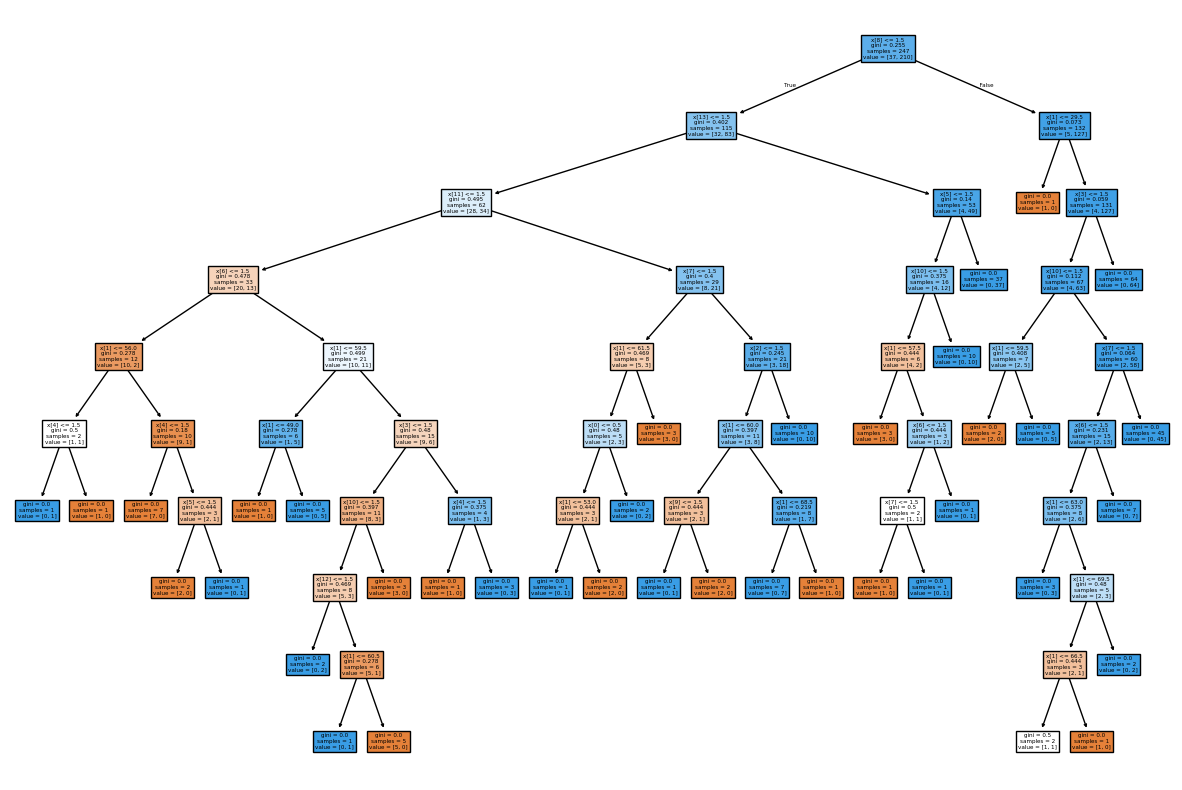

In [ ]:
plt.figure(figsize=(15,10))
tree.plot_tree(decisionTree, filled=True)

#Random Forest

In [ ]:
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier()
randomForest.fit(x_train, y_train)

y_pred = randomForest.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100}")
print(classification_report(y_test, y_pred, target_names=["No Cancer", "Cancer"]))

Accuracy: 96.7741935483871
              precision    recall  f1-score   support

   No Cancer       0.50      0.50      0.50         2
      Cancer       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



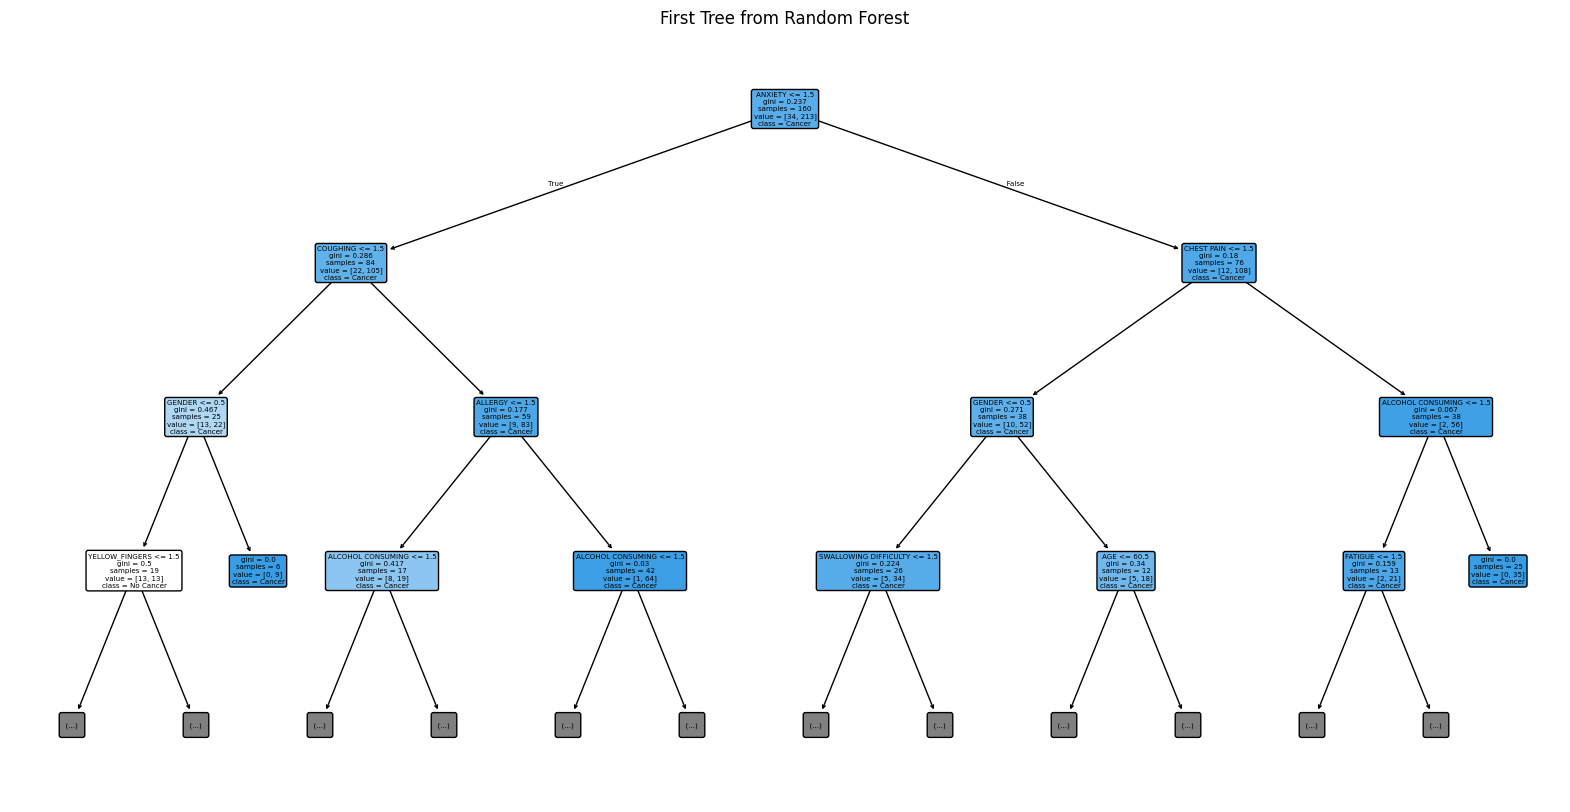

In [ ]:
single_tree = randomForest.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(single_tree,
          feature_names=x.columns,
          class_names=['No Cancer', 'Cancer'],
          filled=True,
          rounded=True,
          max_depth=3)

plt.title("First Tree from Random Forest")
plt.show()

<Axes: >

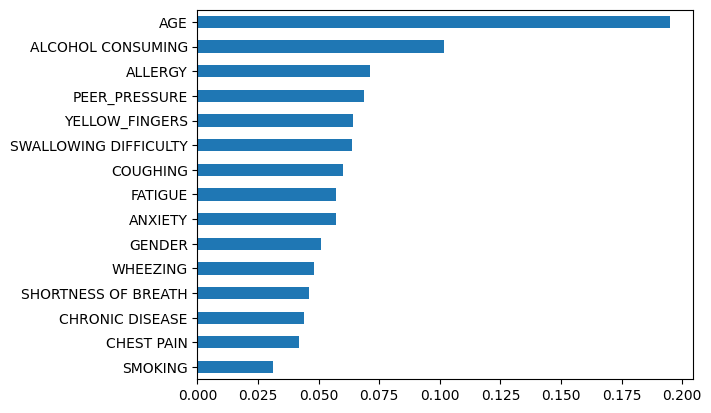

In [ ]:
pd.Series(randomForest.feature_importances_,
         index=x.columns).sort_values().plot(kind='barh')